In [1]:
# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# classificacao
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("db/UCI_Credit_Card.csv", sep=",")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

##### ID: ID de cada cliente

##### LIMIT_BAL: Valor do crédito concedido em dólares NT (inclui crédito individual e familiar/complementar)

##### SEXO: Gênero (1=masculino, 2=feminino)

##### EDUCAÇÃO: (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros, 5=desconhecido, 6=desconhecido)

##### CASAMENTO: Estado civil (1=casado, 2=solteiro, 3=outros)

##### IDADE: Idade em anos

##### PAY_0:     Situação do reembolso em setembro de 2005 (-1=pagamento devido, 1=atraso no pagamento por um mês, 2=atraso no pagamento por dois meses,… 8=atraso no pagamento por oito meses, 9=atraso no pagamento por nove meses ou mais)
##### PAY_2:     Situação do reembolso em agosto de 2005 (escala igual à acima)
##### PAY_3:     Status do reembolso em julho de 2005 (escala igual à acima)
##### PAY_4:     Situação do reembolso em junho de 2005 (escala igual à acima)
##### PAY_5:     Situação do reembolso em maio de 2005 (escala igual à acima)
##### PAY_6:     Status de reembolso em abril de 2005 (escala igual à acima)

##### BILL_AMT1: Valor do extrato da conta em setembro de 2005 (dólar NT)
##### BILL_AMT2: Valor do extrato da conta em agosto de 2005 (dólar NT)
##### BILL_AMT3: Valor do extrato da conta em julho de 2005 (dólar NT)
##### BILL_AMT4: Valor do extrato da conta em junho de 2005 (dólar NT)
##### BILL_AMT5: Valor do extrato da conta em maio de 2005 (dólar NT)
##### BILL_AMT6: Valor do extrato da conta em abril de 2005 (dólar NT)

##### PAY_AMT1:  Valor do pagamento anterior em setembro de 2005 (dólar NT)
##### PAY_AMT2:  Valor do pagamento anterior em agosto de 2005 (dólar NT)
##### PAY_AMT3:  Valor do pagamento anterior em julho de 2005 (dólar NT)
##### PAY_AMT4:  Valor do pagamento anterior em junho de 2005 (dólar NT)
##### PAY_AMT5:  Valor do pagamento anterior em maio de 2005 (dólar NT)
##### PAY_AMT6:  Valor do pagamento anterior em abril de 2005 (dólar NT)

##### default.payment.next.month: INADIMPLENTE (1=sim, 0=não)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                             'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0',
                             'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1',
                             'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1',
                             'default.payment.next.month' ]]

In [7]:
df.rename(columns={'SEX':'SEXO', 'EDUCATION':'EDUCACAO','MARRIAGE':'CASADO(A)','AGE':'IDADE'}, inplace=True)
df.rename(columns={'PAY_0':'STT_set', 'PAY_2':'STT_ago','PAY_3':'STT_jul','PAY_4':'STT_jun','PAY_5':'STT_mai','PAY_6':'STT_abr'}, inplace=True)
df.rename(columns={'BILL_AMT1':'EXT_set', 'BILL_AMT2':'EXT_ago','BILL_AMT3':'EXT_jul','BILL_AMT4':'EXT_jun','BILL_AMT5':'EXT_mai','BILL_AMT6':'EXT_abr'}, inplace=True)
df.rename(columns={'PAY_AMT1':'PAG_set', 'PAY_AMT2':'PAG_ago', 'PAY_AMT3':'PAG_jul', 'PAY_AMT4':'PAG_jun', 'PAY_AMT5':'PAG_mai', 'PAY_AMT6':'PAG_abr'}, inplace=True)
df.rename(columns={'default.payment.next.month':'INADIMPLENTE'}, inplace=True)
df.rename(columns={'LIMIT_BAL':'LIM_DISPON'}, inplace=True)
df.head()

,ID,LIM_DISPON,SEXO,EDUCACAO,CASADO(A),IDADE,STT_abr,STT_mai,STT_jun,STT_jul,...,EXT_jul,EXT_ago,EXT_set,PAG_abr,PAG_mai,PAG_jun,PAG_jul,PAG_ago,PAG_set,INADIMPLENTE
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [8]:
df.isna().sum()

ID              0
LIM_DISPON      0
SEXO            0
EDUCACAO        0
CASADO(A)       0
IDADE           0
STT_abr         0
STT_mai         0
STT_jun         0
STT_jul         0
STT_ago         0
STT_set         0
EXT_abr         0
EXT_mai         0
EXT_jun         0
EXT_jul         0
EXT_ago         0
EXT_set         0
PAG_abr         0
PAG_mai         0
PAG_jun         0
PAG_jul         0
PAG_ago         0
PAG_set         0
INADIMPLENTE    0
dtype: int64

In [9]:
## sns.pairplot(df)

In [10]:
print(f'{df['EDUCACAO'].value_counts()}')
print(f'{df['SEXO'].value_counts()}')
print(f'{df['CASADO(A)'].value_counts()}')


EDUCACAO
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
SEXO
2    18112
1    11888
Name: count, dtype: int64
CASADO(A)
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [11]:
df.INADIMPLENTE.value_counts(normalize=True) * 100

INADIMPLENTE
0    77.88
1    22.12
Name: proportion, dtype: float64

In [12]:
df_sem = df
df_sem = df.drop(columns=['ID', 'INADIMPLENTE'])

In [13]:
df_sem.corr()

,LIM_DISPON,SEXO,EDUCACAO,CASADO(A),IDADE,STT_abr,STT_mai,STT_jun,STT_jul,STT_ago,...,EXT_jun,EXT_jul,EXT_ago,EXT_set,PAG_abr,PAG_mai,PAG_jun,PAG_jul,PAG_ago,PAG_set
LIM_DISPON,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.235195,-0.249411,-0.267460,-0.286123,-0.296382,...,0.293988,0.283236,0.278314,0.285430,0.219595,0.217202,0.203242,0.210167,0.178408,0.195236
SEXO,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.044008,-0.055064,-0.060173,-0.066096,-0.070771,...,-0.021880,-0.024563,-0.031183,-0.033642,-0.002766,-0.001667,-0.002229,-0.008597,-0.001391,-0.000242
EDUCACAO,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.082316,0.097520,0.108793,0.114025,0.121566,...,-0.000451,0.013002,0.018749,0.023581,-0.037200,-0.040358,-0.038218,-0.039943,-0.030038,-0.037456
CASADO(A),-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.034345,0.035629,0.033122,0.032688,0.024199,...,-0.023344,-0.024909,-0.021602,-0.023472,-0.006641,-0.001205,-0.012659,-0.003541,-0.008093,-0.005979
IDADE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.048773,-0.053826,-0.049722,-0.053048,-0.050148,...,0.051353,0.053710,0.054283,0.056239,0.019478,0.022850,0.021379,0.029247,0.021785,0.026147
STT_abr,-0.235195,-0.044008,0.082316,0.034345,-0.048773,1.000000,0.816900,0.716449,0.632684,0.575501,...,0.266356,0.241181,0.226924,0.207373,-0.025299,-0.046434,0.019018,0.005834,-0.005223,-0.001496
STT_mai,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.816900,1.000000,0.819835,0.686775,0.622780,...,0.271915,0.243335,0.226913,0.206684,-0.023027,-0.033337,-0.058299,0.009062,-0.003191,-0.006089
STT_jun,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.716449,0.819835,1.000000,0.777359,0.662067,...,0.245917,0.244983,0.225816,0.202812,-0.026565,-0.033590,-0.043461,-0.069235,-0.001944,-0.009362
STT_jul,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.632684,0.686775,0.777359,1.000000,0.766552,...,0.227202,0.227494,0.237295,0.208473,-0.035861,-0.035863,-0.046067,-0.053311,-0.066793,0.001295
STT_ago,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.575501,0.622780,0.662067,0.766552,1.000000,...,0.222237,0.224146,0.235257,0.234887,-0.036500,-0.037093,-0.046858,-0.055901,-0.058990,-0.080701


In [14]:
X, y = df.drop(columns="INADIMPLENTE"), df["INADIMPLENTE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
modelLLR = LogisticRegression()
modelLR = LinearRegression()

X.shape , y.shape

((30000, 24), (30000,))

In [16]:
modelLLR.fit(X_train, y_train)


c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred_LLR = modelLLR.predict(X_test)

y_pred_LLR[: 10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
accuracy_score(y_test, y_pred_LLR)

0.7811666666666667

In [19]:
y_pred_LLR_reduce = np.zeros(y_test.shape[0])

In [20]:
y_pred_LLR_reduce[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
accuracy_score(y_test, y_pred_LLR)

0.7811666666666667

In [22]:
confusion_matrix(y_true=y_test, y_pred=y_pred_LLR)


array([[4687,    0],
       [1313,    0]])

<Axes: xlabel='Predicted', ylabel='Actual'>

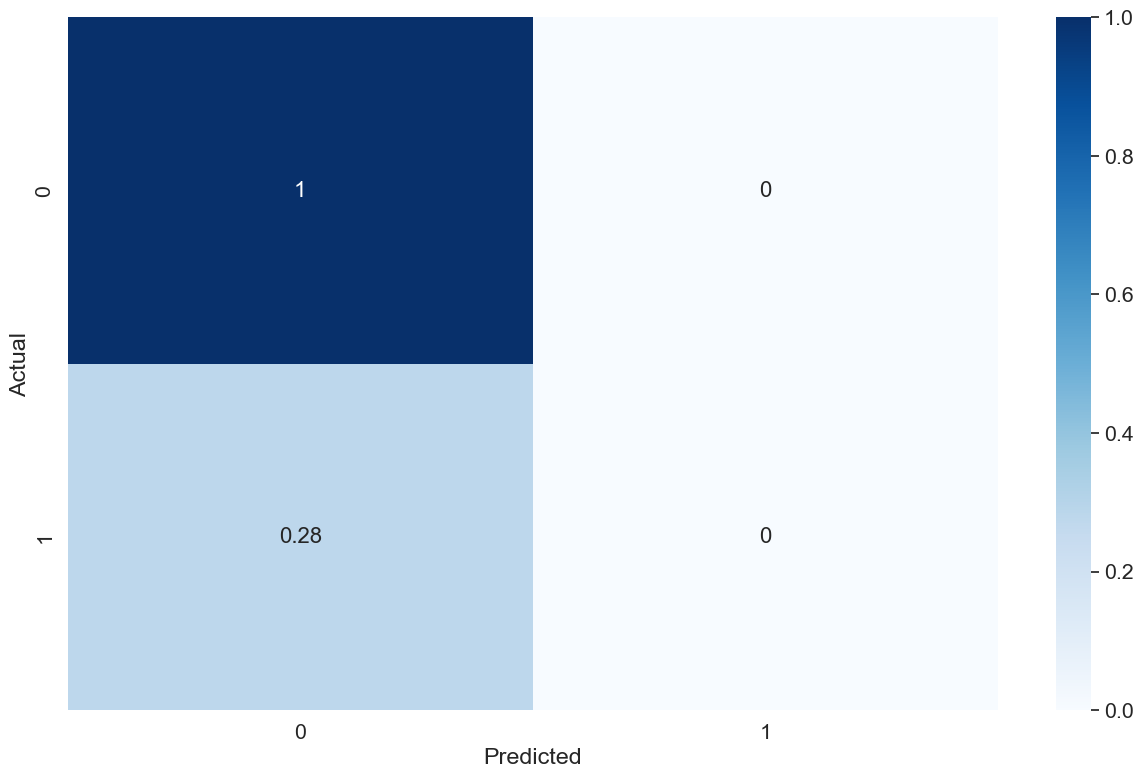

In [23]:
data = confusion_matrix(y_test, y_pred_LLR)
data = data / data.astype(float).sum(axis=1)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,9))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [24]:
print(classification_report(y_test, y_pred_LLR))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [25]:
print(f1_score(y_test, y_pred_LLR))

0.0


In [26]:
print(f1_score(y_test, y_pred_LLR_reduce))

0.0


In [27]:
print(classification_report(y_test, y_pred_LLR_reduce))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [28]:
# Escalando os dados para melhorar a convergência
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
modelLLR = LogisticRegression(max_iter=1000, solver='saga')
modelLLR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [30]:
y_pred_LLR = modelLLR.predict(X_test)


In [31]:
accuracy = accuracy_score(y_test, y_pred_LLR)
print(f"Acurácia: {accuracy}")

Acurácia: 0.81


In [32]:
# Exibindo a matriz de confusão normalizada
data = confusion_matrix(y_test, y_pred_LLR)
data = data / data.astype(float).sum(axis=1)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print("Matriz de Confusão Normalizada:")
print(df_cm)

Matriz de Confusão Normalizada:
Predicted         0         1
Actual                       
0          0.970770  0.104341
1          0.213996  0.236101


In [33]:
# Validação cruzada
res = cross_val_score(modelLLR, X_train, y_train, cv=5)
print(f"Média da Validação Cruzada: {res.mean()}")

Média da Validação Cruzada: 0.8100833333333333


In [34]:
print(classification_report(y_test, y_pred_LLR))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [35]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = cross_validate(estimator=modelLLR, X=X_train, y=y_train,
                           cv=kf5, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [36]:
df_results_cv = pd.DataFrame(results_cv)
df_results_cv.head()

,fit_time,score_time,estimator,test_score,train_score
0,3.605270,0.001000,"LogisticRegression(max_iter=1000, solver='saga')",0.811042,0.810937
1,2.519191,0.001000,"LogisticRegression(max_iter=1000, solver='saga')",0.814375,0.810833
2,3.272248,0.001000,"LogisticRegression(max_iter=1000, solver='saga')",0.808125,0.811458
3,1.749132,0.002002,"LogisticRegression(max_iter=1000, solver='saga')",0.804792,0.810937
4,2.875218,0.001002,"LogisticRegression(max_iter=1000, solver='saga')",0.812292,0.808646


In [37]:
df_results_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fit_time     5 non-null      float64
 1   score_time   5 non-null      float64
 2   estimator    5 non-null      object 
 3   test_score   5 non-null      float64
 4   train_score  5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 332.0+ bytes


In [38]:
df_results_cv.estimator[2].predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
def plot_cv(estimator, X, y, n_splits, scoring):
    '''
    scoring: string relativa às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    display(df_result_cv[["train_score", "test_score"]].describe())
    
    # ============================
    
    print("\nDistribuição de métricas de treino:")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    
    print("\nDistribuição de métricas de teste:")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()
    
    print("\nAs duas juntas (compare a variância!):")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    sns.histplot(data=df_result_cv, x="test_score", color="orange", kde=True)
    plt.show()

c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Polga-Fe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached w

,train_score,test_score
count,20.000000,20.000000
mean,0.778772,0.778733
std,0.000581,0.010933
min,0.777789,0.750000
25%,0.778535,0.773167
50%,0.778825,0.778000
75%,0.779026,0.783500
max,0.780281,0.797333



Distribuição de métricas de treino:


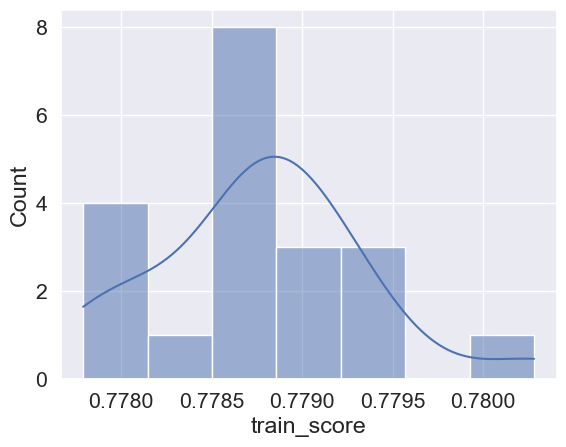


Distribuição de métricas de teste:


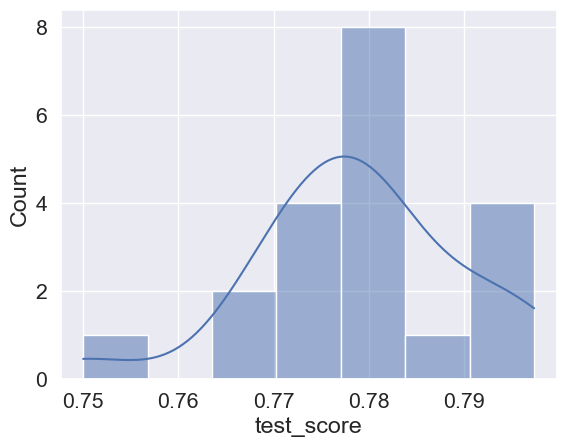


As duas juntas (compare a variância!):


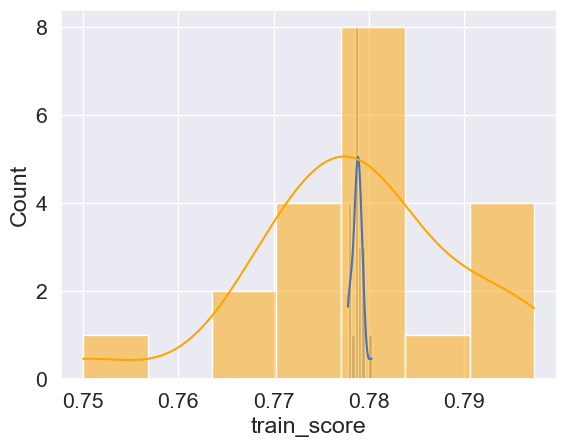

In [40]:
plot_cv(modelLLR, X, y, 20, 'accuracy')

In [41]:
print(classification_report(y_test, y_pred_LLR))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [42]:
modelLR.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = modelLR.predict(X_test)

y_pred[: 10]

array([0.24877427, 0.17479872, 0.22027915, 0.25346974, 0.20737035,
       0.11149443, 0.37268091, 0.28598323, 0.06351652, 0.14510985])

In [44]:
r2_score(y_test, y_pred)

0.1186075478239631

In [45]:
mean_absolute_error(y_test, y_pred)

np.float64(0.3065591102777336)

In [46]:
mean_squared_error(y_test, y_pred)

np.float64(0.15066990205159303)

In [47]:
pd.DataFrame(data={"y_test": y_test, "y_pred": y_pred}).round(2)

,y_test,y_pred
2308,0,0.25
22404,0,0.17
23397,0,0.22
25058,0,0.25
2664,1,0.21
...,...,...
2210,0,0.26
14144,1,0.37
23108,0,0.26
25703,0,0.31


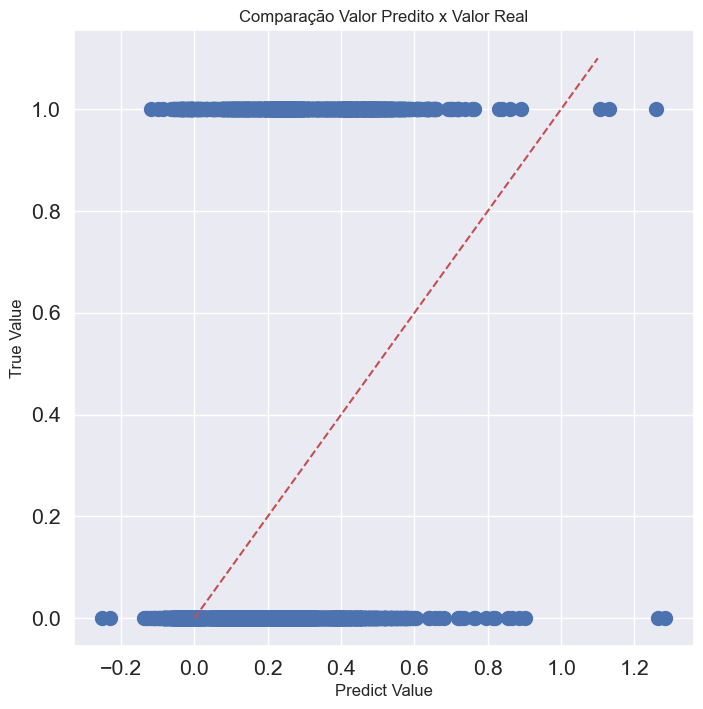

In [48]:
## define tamanho da figura
fig = plt.figure(figsize=(8,8))

# Configurações do plot
l = plt.plot(y_pred, y_test, 'bo') # Define os eixos x e y. O argumento 'bo' indica que queremos que os elementos
                                    # apareçam como circulos azuis
plt.setp(l, markersize=10)          # Aqui definimos o tamanho dos circulos
plt.setp(l, markerfacecolor='C0')   # Aqui definimos a cor do contorno

## Titulo e eixos
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

## Aqui definimos a equação da reta de aproximação e adicionamos ela no plot
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

## Exibição
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   LIM_DISPON    30000 non-null  float64
 2   SEXO          30000 non-null  int64  
 3   EDUCACAO      30000 non-null  int64  
 4   CASADO(A)     30000 non-null  int64  
 5   IDADE         30000 non-null  int64  
 6   STT_abr       30000 non-null  int64  
 7   STT_mai       30000 non-null  int64  
 8   STT_jun       30000 non-null  int64  
 9   STT_jul       30000 non-null  int64  
 10  STT_ago       30000 non-null  int64  
 11  STT_set       30000 non-null  int64  
 12  EXT_abr       30000 non-null  float64
 13  EXT_mai       30000 non-null  float64
 14  EXT_jun       30000 non-null  float64
 15  EXT_jul       30000 non-null  float64
 16  EXT_ago       30000 non-null  float64
 17  EXT_set       30000 non-null  float64
 18  PAG_abr       30000 non-nu

In [50]:
df['STT_abr'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [51]:
df[['STT_abr','STT_mai', 'STT_jun', 'STT_jul', 'STT_ago','STT_set']].value_counts()


STT_abr  STT_mai  STT_jun  STT_jul  STT_ago  STT_set
 0        0        0        0        0        0         9821
-2       -2       -2       -2       -2       -2         2109
-1       -1       -1       -1       -1       -1         1992
-2       -2       -2       -2       -2        1          651
 2        2        2        2        2        2          530
                                                        ... 
 4        3        2        2        3        3            1
                                     2        1            1
                                     0        0            1
          2        2        3        4        3            1
          4        4        4        3        3            1
Name: count, Length: 1106, dtype: int64

In [52]:
cols = ['STT_abr','STT_mai', 'STT_jun', 'STT_jul', 'STT_ago','STT_set']
df[cols] = df[cols].where(df[cols] <= 9, 9)

df[cols]

,STT_abr,STT_mai,STT_jun,STT_jul,STT_ago,STT_set
0,-2,-2,-1,-1,2,2
1,2,0,0,0,2,-1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,-1,0,-1
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,0,0,-1,-1,-1,-1
29997,0,0,-1,2,3,4
29998,-1,0,0,0,-1,1
